# IPL DATA ANALYSIS

### loading the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', None)
%matplotlib inline


# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')


In [3]:

# load dataset
df = pd.read_csv('ipl data.csv')

#having a glance at the first five records of the dataset
df.head(10)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [99]:
#df=pd.read_csv('ipl data.csv')
#df.head(10) #.style.set_properties(**{"background-color":"black","color":"white",'width':300})

In [100]:
# looking at the number of rows and column in the dataset
df.shape

(756, 18)

In [101]:
df.ndim

2

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [103]:
pd.DataFrame(df.dtypes,columns=['Datatype']).rename_axis("Column Name")

,Datatype
Column Name,
id,int64
season,int64
city,object
date,object
team1,object
team2,object
toss_winner,object
toss_decision,object
result,object


In [104]:
df.isnull()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
754,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [105]:
X=pd.DataFrame(df.isnull().sum(),columns=["Null Values"]).rename_axis("column Name")
X

,Null Values
column Name,
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0


<AxesSubplot:>

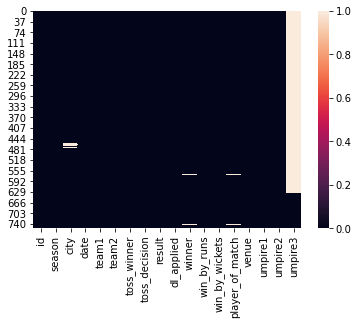

In [106]:
sns.heatmap(df.isnull())

In [107]:
df.fillna(0,inplace=True)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0


In [108]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [109]:
df['umpire3']

0                            0
1                            0
2                            0
3                            0
4                            0
                ...           
751                     S Ravi
752                  Ian Gould
753                          0
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, Length: 756, dtype: object

In [110]:
df.pop('umpire3')

0                            0
1                            0
2                            0
3                            0
4                            0
                ...           
751                     S Ravi
752                  Ian Gould
753                          0
754    Chettithody Shamshuddin
755                Nigel Llong
Name: umpire3, Length: 756, dtype: object

In [111]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,0,0
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [112]:
df.groupby('season').sum()

,id,dl_applied,win_by_runs,win_by_wickets
season,,,,
2008,5133,2,705,221
2009,8322,3,764,180
2010,12270,0,976,190
2011,19783,3,1098,265
2012,25493,0,960,241
2013,31882,0,1241,227
2014,29250,1,644,225
2015,32273,2,850,148
2016,36390,4,676,244


In [4]:
df.groupby('winner')['win_by_runs'].count()

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: win_by_runs, dtype: int64

#### Mumbai Indians and Chennai Super King most winner as compaire to other teams

In [5]:
df.groupby('winner')['win_by_runs'].max()

winner
Chennai Super Kings             97
Deccan Chargers                 82
Delhi Capitals                  39
Delhi Daredevils                97
Gujarat Lions                    1
Kings XI Punjab                111
Kochi Tuskers Kerala            17
Kolkata Knight Riders          140
Mumbai Indians                 146
Pune Warriors                   38
Rajasthan Royals               105
Rising Pune Supergiant          61
Rising Pune Supergiants         34
Royal Challengers Bangalore    144
Sunrisers Hyderabad            118
Name: win_by_runs, dtype: int64

#### Mumbai Indians ,Royal Challengers Bangalore and Kolkata Knight Riders win by maximum runs as compaire to other teams

In [6]:
df.groupby('winner')['win_by_wickets'].max()

winner
Chennai Super Kings            10
Deccan Chargers                10
Delhi Capitals                  7
Delhi Daredevils               10
Gujarat Lions                   7
Kings XI Punjab                10
Kochi Tuskers Kerala            8
Kolkata Knight Riders          10
Mumbai Indians                 10
Pune Warriors                   7
Rajasthan Royals               10
Rising Pune Supergiant          9
Rising Pune Supergiants         9
Royal Challengers Bangalore    10
Sunrisers Hyderabad            10
Name: win_by_wickets, dtype: int64

#### Nine teams have won matches with a maximum of 10 wickets

In [7]:
df['player_of_match']

0      Yuvraj Singh
1         SPD Smith
2           CA Lynn
3        GJ Maxwell
4         KM Jadhav
           ...     
751       HH Pandya
752        AS Yadav
753         RR Pant
754    F du Plessis
755       JJ Bumrah
Name: player_of_match, Length: 756, dtype: object

In [8]:
df[df['player_of_match']=='Yuvraj Singh'].count()

id                 5
season             5
city               5
date               5
team1              5
team2              5
toss_winner        5
toss_decision      5
result             5
dl_applied         5
winner             5
win_by_runs        5
win_by_wickets     5
player_of_match    5
venue              5
umpire1            5
umpire2            5
umpire3            0
dtype: int64

#### Yuvraj Singh has won man of the match five times from 2008 to 2019

In [9]:
df[df['player_of_match']=='MS Dhoni'].count()

id                 17
season             17
city               17
date               17
team1              17
team2              17
toss_winner        17
toss_decision      17
result             17
dl_applied         17
winner             17
win_by_runs        17
win_by_wickets     17
player_of_match    17
venue              17
umpire1            17
umpire2            17
umpire3             4
dtype: int64

#### Mahendra Singh Dhoni has won man of the match seventeen times from 2008 to 2019

## visualizing the different groups in the dataset

In [33]:
df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

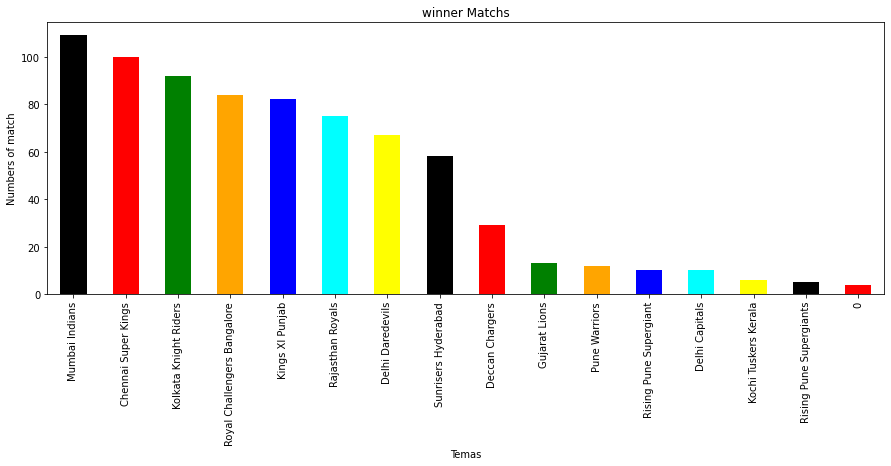

In [115]:
plt.subplots(figsize=(15,5))
df['winner'].value_counts(normalize = True)
df['winner'].value_counts(dropna = False).plot.bar(color=['black','red', 'green','orange', 'blue', 'cyan','yellow'])
plt.xlabel('Temas')
plt.ylabel('Numbers of match')
plt.title("winner Matchs")
plt.show()

### Mumbai Indians and Chennai Super Kings most time won matches 109 and 100 respectively

### # Prepare Data

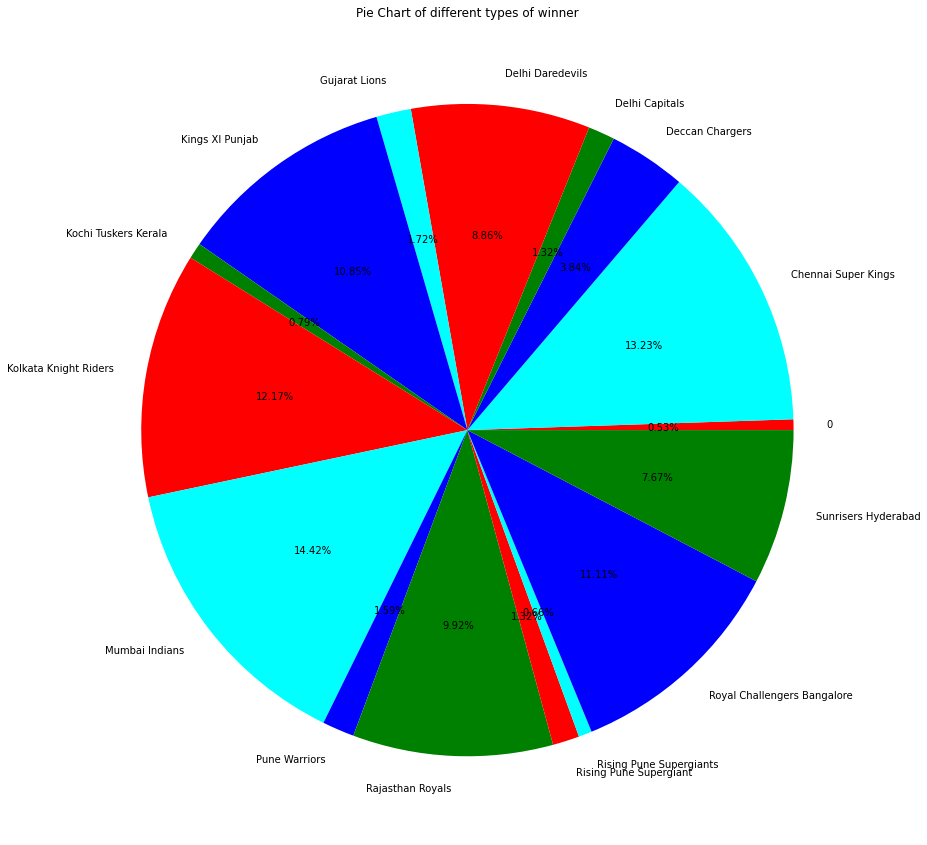

In [94]:
df = df.groupby('winner').size()
colors = ['red', 'cyan', 'blue','green']
# Make the plot with pandas
df.plot(kind='pie',colors=colors, subplots=True, figsize=(20, 15), autopct = '%.2f%%')
plt.title("Pie Chart of different types of winner")
plt.ylabel("")
plt.show()

In [116]:
#Looking at the number of matches played each season
df['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

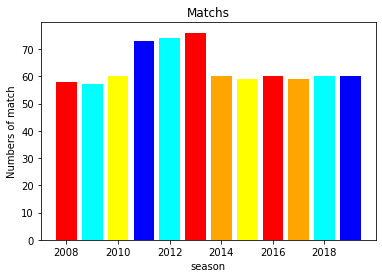

In [117]:
plt.figure(figsize=(6,4))
plt.bar(list(df['season'].value_counts().keys()),list(df['season'].value_counts()),color=['red','cyan','blue','yellow','orange'])
plt.xlabel('season')
plt.ylabel('Numbers of match')
plt.title("Matchs")
plt.show()

## The heighest number of matches was played in the 2013 season and the lowest number of matches were played in the 2009 season

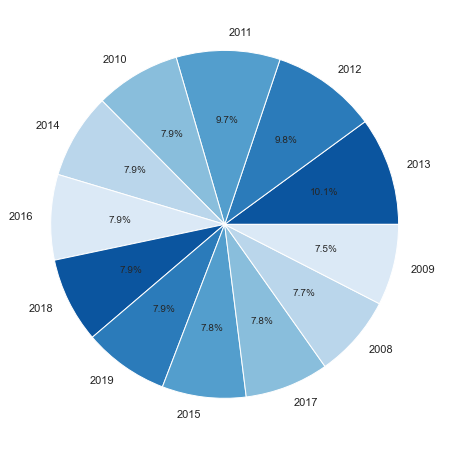

In [86]:
plt.figure(figsize=(8,8))
plt.pie(list(df['season'].value_counts()),labels=list(df['season'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [87]:
#Looking at the number of matches played in each city
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

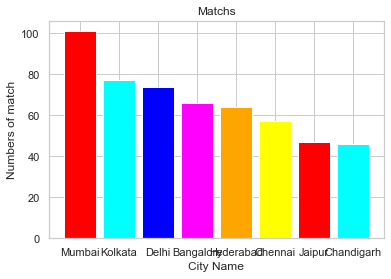

In [103]:
plt.figure(figsize=(6,4))
plt.bar(list(df['city'].value_counts()[0:8].keys()),list(df['city'].value_counts()[0:8]),color=['red','cyan','blue','magenta','orange','yellow'])
plt.xlabel('City Name')
plt.ylabel('Numbers of match')
plt.title("Matchs")
plt.show()

## Most matches were placed in Mumbai from season 2008 to 2019

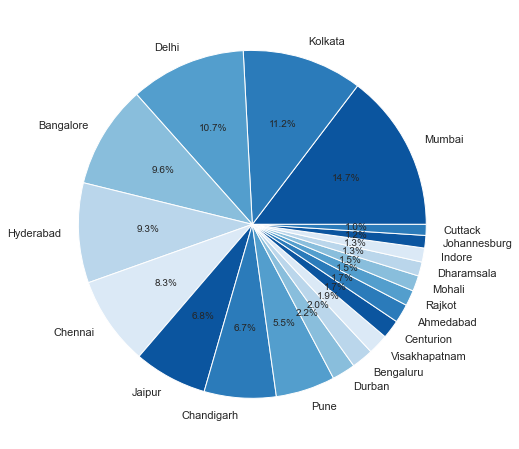

In [89]:
plt.figure(figsize=(8,8))
plt.pie(list(df['city'].value_counts()[0:20]),labels=list(df['city'].value_counts()[0:20].keys()),autopct='%0.1f%%')
plt.show()

In [17]:
#Finding out how many times a team has won the match after winning the toss
np.sum(df['toss_winner']==df['winner'])

393

In [14]:
393/756

0.5198412698412699

In [ ]:
# 52 % a team has won the match after winning the toss

In [36]:
# Getting the  frequency of most man of the match awards
df2=df['player_of_match'].value_counts()
df2

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
                  ..
RS Bopara          1
GD McGrath         1
Umar Gul           1
H Gurney           1
RA Tripathi        1
Name: player_of_match, Length: 226, dtype: int64

### The heighest player of match got the player between season 2008 to 2019 is 'CH Gayle'

In [174]:
df2.head(10)

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

In [63]:
# Getting the top 5 players with most man of the match awards
df['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

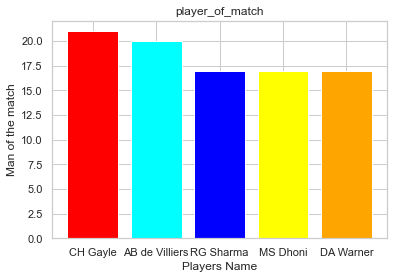

In [90]:
plt.figure(figsize=(6,4))
plt.bar(list(df['player_of_match'].value_counts()[0:5].keys()),list(df['player_of_match'].value_counts()[0:5]),color=['red','cyan','blue','yellow','orange'])
plt.xlabel('Players Name')
plt.ylabel('Man of the match')
plt.title("player_of_match")
plt.show()

## Chirs Gayle is the most Man of the Match player of the season from 2008 to 2019

In [125]:
# Getting the frequencyof result column
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

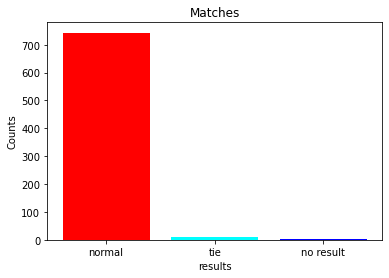

In [131]:
plt.figure(figsize=(6,4))
plt.bar(list(df['result'].value_counts()[0:3].keys()),list(df['result'].value_counts()[0:3]),color=['red','cyan','blue'])
plt.xlabel('results')
plt.ylabel('Counts')
plt.title('Matches')
plt.show()

#### ** find out the number of toss wins with respect to each team

In [78]:
df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

## Extracting the records where a team won batting first

In [73]:
batting_first=df[df['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,0,0,0
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,0
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,0
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,0


Text(0.5, 1.0, 'Distribution of runs')

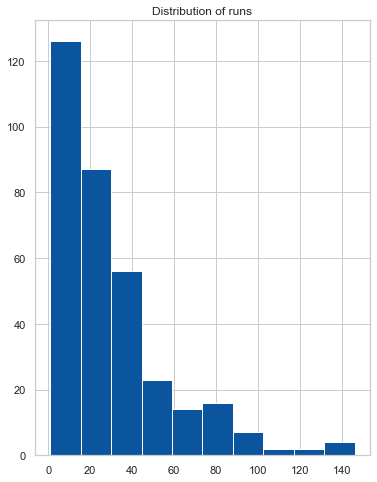

In [91]:
# making a histogram 
plt.figure(figsize=(6,8))
plt.hist(batting_first['win_by_runs'])
plt.title('Distribution of runs')
#plt.xlable("Runs")

### find out the number of wins with respect to each team after batting first

In [104]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

## Making a bar plot for top 5 teams with most win after batting first

Text(0, 0.5, 'Matchs')

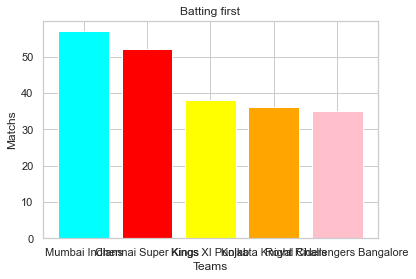

In [92]:
plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()),list(batting_first["winner"].value_counts()[0:5]),color=['cyan','red','yellow','orange','pink'])
plt.title("Batting first")
plt.xlabel('Teams')
plt.ylabel('Matchs')

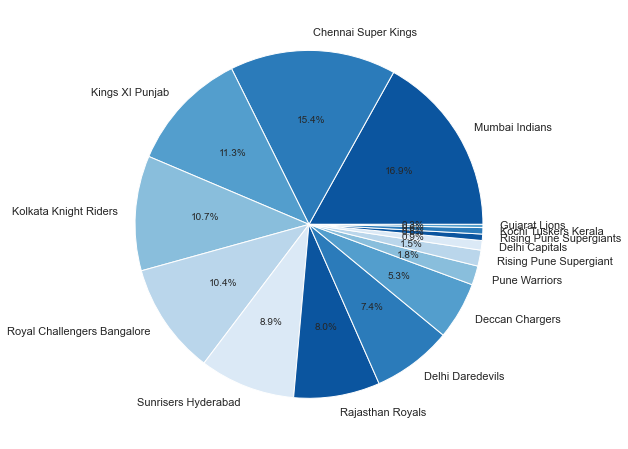

In [93]:
# Making a pie chart
plt.figure(figsize=(8,8))
plt.pie(list(batting_first["winner"].value_counts()),labels=list(batting_first["winner"].value_counts().keys()),autopct='%0.1f%%')
plt.show()

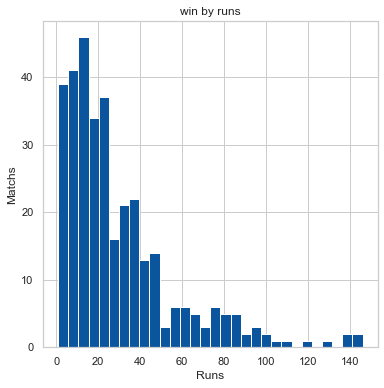

In [94]:
plt.figure(figsize=(6,6))
plt.hist(batting_first['win_by_runs'],bins=30)
plt.xlabel('Runs')
plt.ylabel('Matchs')
plt.title("win by runs")
plt.show()

# Checking Outliers

<AxesSubplot:xlabel='winner', ylabel='win_by_runs'>

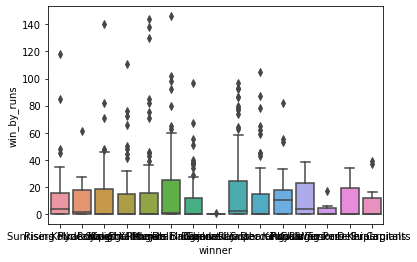

In [5]:
sns.boxplot(x="winner",y="win_by_runs",data=df)

<AxesSubplot:xlabel='winner', ylabel='win_by_runs'>

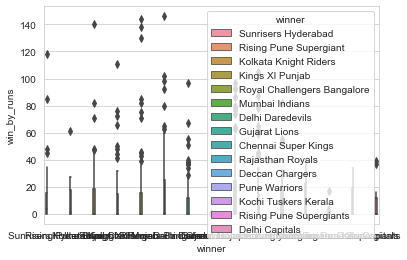

In [9]:
sns.set_style('whitegrid')
sns.boxplot(x="winner",y="win_by_runs",data=df,hue='winner')

## Extracting those records where a team has won after batting second 

In [74]:
batting_second=df[df['win_by_wickets']!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,0
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,0


In [100]:
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

### Making a bar plot for top 5 teams with most win after batting second

Text(0, 0.5, 'Matchs')

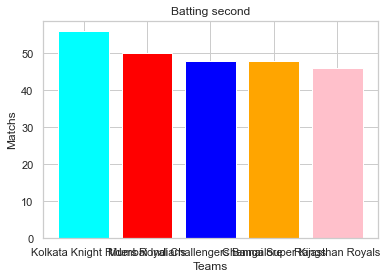

In [95]:
plt.bar(list(batting_second['winner'].value_counts()[0:5].keys()),list(batting_second["winner"].value_counts()[0:5]),color=['cyan','red','blue','orange','pink'])
plt.title("Batting second")
plt.xlabel('Teams')
plt.ylabel('Matchs')

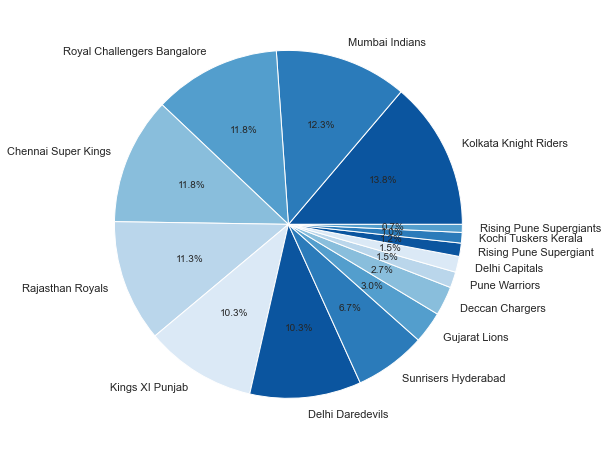

In [96]:
# Making a pie chart
plt.figure(figsize=(8,8))
plt.pie(list(batting_second["winner"].value_counts()),labels=list(batting_second["winner"].value_counts().keys()),autopct='%0.1f%%')
plt.show()

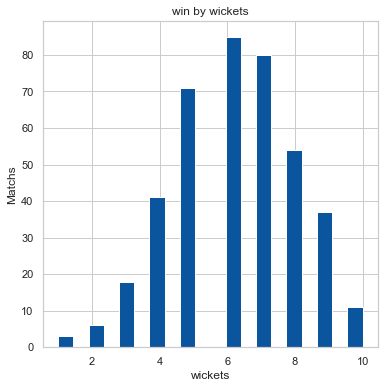

In [97]:
plt.figure(figsize=(6,6))
plt.hist(batting_second['win_by_wickets'],bins=20)
plt.xlabel('wickets')
plt.ylabel('Matchs')
plt.title("win by wickets")
plt.show()

In [16]:
pd.pivot_table(df,index=['winner'])

,dl_applied,id,season,win_by_runs,win_by_wickets
winner,,,,,
Chennai Super Kings,0.020000,2256.750000,2013.090000,17.780000,2.890000
Deccan Chargers,0.000000,214.413793,2010.034483,14.517241,2.482759
Delhi Capitals,0.000000,11298.700000,2019.000000,9.200000,2.900000
Delhi Daredevils,0.029851,853.417910,2012.507463,10.074627,4.104478
Gujarat Lions,0.000000,424.923077,2016.307692,0.076923,5.000000
Kings XI Punjab,0.024390,1655.865854,2013.146341,11.280488,3.268293
Kochi Tuskers Kerala,0.166667,266.666667,2011.000000,3.833333,5.000000
Kolkata Knight Riders,0.043478,1785.434783,2013.815217,11.804348,3.815217
Mumbai Indians,0.000000,1842.816514,2013.678899,17.119266,2.816514


In [17]:
pd.pivot_table(df,index=['player_of_match'])

,dl_applied,id,season,win_by_runs,win_by_wickets
player_of_match,,,,,
A Chandila,0.0000,365.000000,2012.000000,45.000000,0.000000
A Joseph,0.0000,11310.000000,2019.000000,40.000000,0.000000
A Kumble,0.0000,171.333333,2009.000000,6.666667,3.000000
A Mishra,0.0000,2031.181818,2013.090909,8.090909,2.636364
A Nehra,0.0000,412.166667,2013.000000,14.333333,3.833333
...,...,...,...,...,...
Washington Sundar,0.0000,56.000000,2017.000000,20.000000,0.000000
YK Pathan,0.0625,268.125000,2010.750000,4.000000,3.937500
YS Chahal,0.0000,459.000000,2014.000000,0.000000,8.000000


In [40]:
df1=df['winner'].count()
df1

752

In [22]:
x=df['player_of_match'].count()
x

752

In [23]:
df1=df.groupby('player_of_match')['winner'].count()
df1

player_of_match
A Chandila            1
A Joseph              1
A Kumble              3
A Mishra             11
A Nehra               6
                     ..
Washington Sundar     1
YK Pathan            16
YS Chahal             1
Yuvraj Singh          5
Z Khan                1
Name: winner, Length: 226, dtype: int64

In [28]:
#df1[df1['winner']==21].groupby('player_of_match').sum()

In [29]:
##The heighest player of match got the player between season 2008 to 2019 is 'CH Gayle'

In [23]:
#df1.loc[['MS Dhoni','Yuvraj Singh'],['win_by_runs']]

In [24]:
# df1['winner'].min()

In [26]:
#df2=df1[df1['winner']==1].groupby('player_of_match').sum()
#df2

In [27]:
#df2.shape

In [28]:
# In season 2008 to 2019 the 97 players got 1 times player of  match

In [30]:
# Prepare Data
df.groupby('player_of_match').sum()

,id,season,dl_applied,win_by_runs,win_by_wickets
player_of_match,,,,,
A Chandila,365,2012,0,45,0
A Joseph,11310,2019,0,40,0
A Kumble,514,6027,0,20,9
A Mishra,22343,22144,0,89,29
A Nehra,2473,12078,0,86,23
...,...,...,...,...,...
Washington Sundar,56,2017,0,20,0
YK Pathan,4290,32172,1,64,63
YS Chahal,459,2014,0,0,8


In [117]:
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [109]:
df[df['winner']=='Mumbai Indians'].groupby('win_by_runs').count()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
win_by_runs,,,,,,,,,,,,,,,,,
0,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,7
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
9,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Text(0.5, 1.0, 'Mumbai Indians')

<Figure size 1800x1080 with 0 Axes>

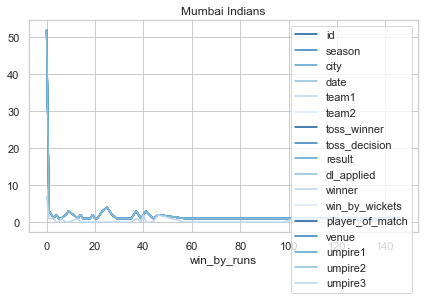

In [150]:
plt.figure(figsize=(25,15))
df[df['winner']=='Mumbai Indians'].groupby('win_by_runs').count().plot()
plt.tight_layout()
plt.title('Mumbai Indians')

In [153]:
df[df['winner']=='Chennai Super Kings'].groupby('win_by_runs').count()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
win_by_runs,,,,,,,,,,,,,,,,,
0,48,48,47,48,48,48,48,48,48,48,48,48,48,48,48,48,15
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
7,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


Text(0.5, 1.0, 'Chennai Super Kings')

<Figure size 1800x1440 with 0 Axes>

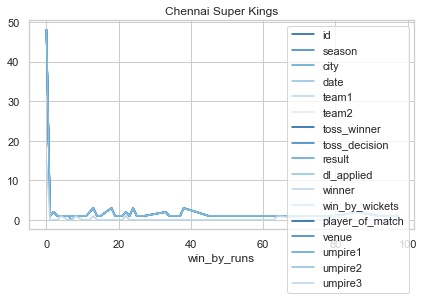

In [155]:
plt.figure(figsize=(25,20))
df[df['winner']=='Chennai Super Kings'].groupby('win_by_runs').count().plot()
plt.tight_layout()
plt.title('Chennai Super Kings')

<AxesSubplot:xlabel='win_by_runs', ylabel='Density'>

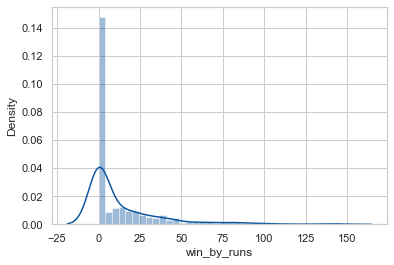

In [98]:
sns.distplot(df['win_by_runs'])

# Pair Plot

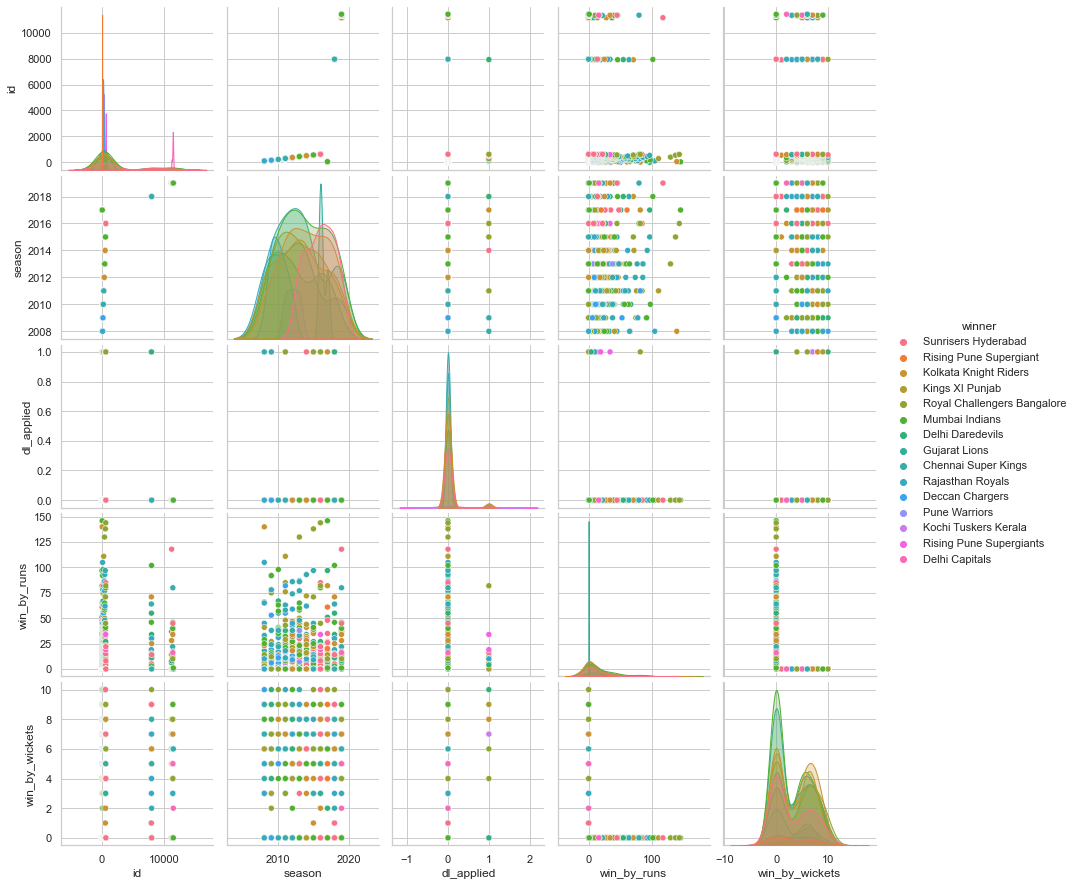

In [99]:
sns.pairplot(df,hue='winner')

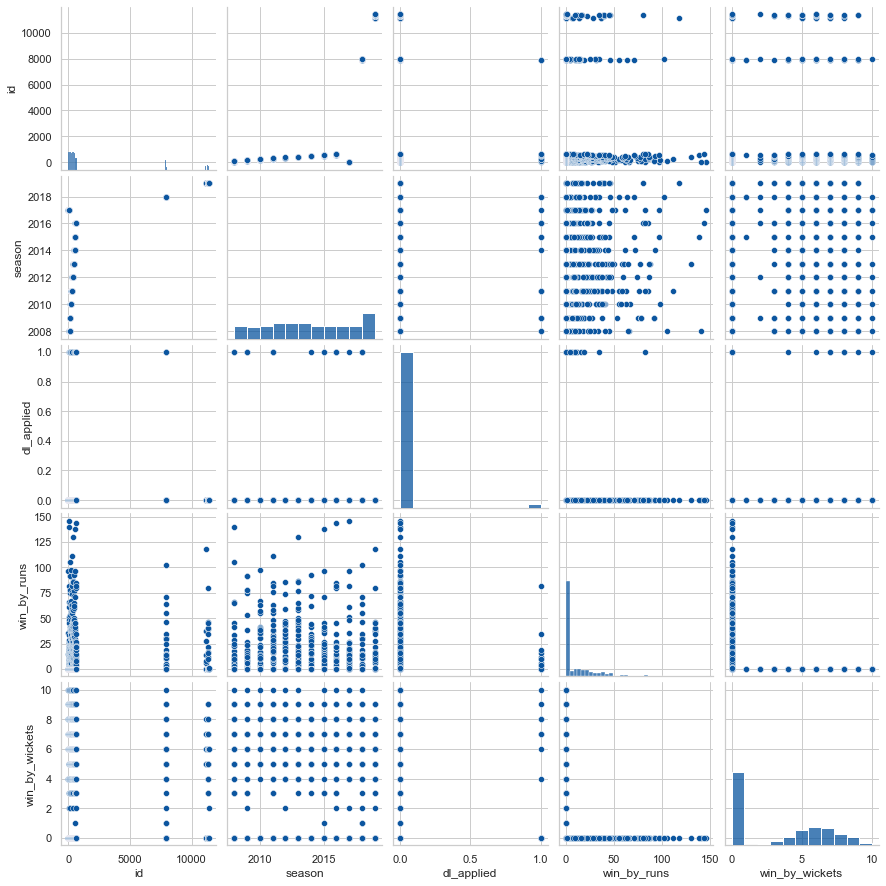

In [105]:
#Pairplot
#it plots between numerical columns only.

sns.pairplot(df)

In [100]:
x=df.corr()
x

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


<AxesSubplot:>

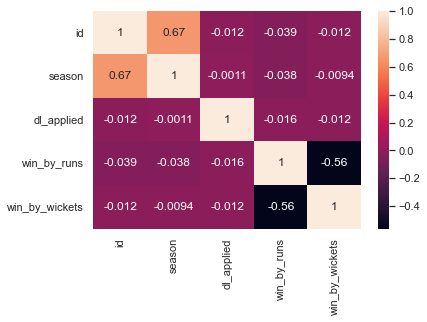

In [76]:
sns.heatmap(x,annot=True)